# AR(1) - model


Let's generate first 1000 values of {X} (i.e. X1,.., X1000) for a = 0.999; recall that

then {Xn} is stationary. We will use a loop from 1 to n = 1000. We choose Xo = 1.

Note that if X is stored in a Numpy array, it's better to create first an "empty" array with

all entries equal to 0, and then just assign (otherwise, the array would become larger on

each step, and this is very much time and memory consuming). So, let's run the

following code, and plot the corresponding time series:

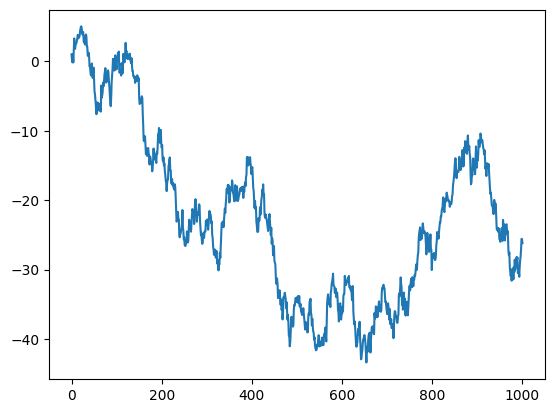

In [77]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

a = 0.999
n = 1000

z = norm.rvs(size = n+1)
x = np.zeros(n+1)

x[0] = 1

for i in range(1, n+1):
    x[i] = a * x[i-1] + z[i]
plt.plot(x)
plt.show()

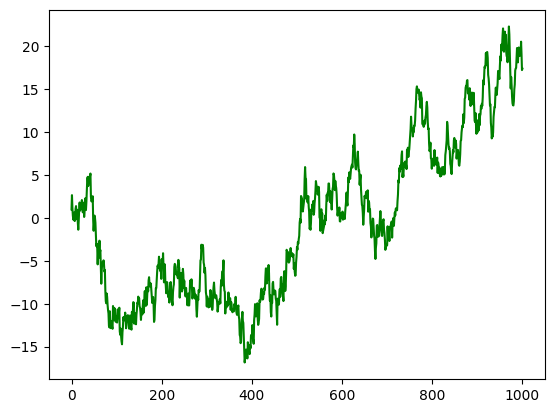

In [78]:
a = 0.999
n = 1000
x = np.zeros(n+1)
x[0] = 1

for i in range(1, n+1):
    x[i] = a * x[i-1] + norm.rvs(size = 1)[0]

plt.plot(x, color = "green")
plt.show()

## Task 1.1
Generate the first 10^6 values of the time series {Xn} and plot the graph. Include some comments into your code explaining the steps. (Recall that comments in Python are any text after # symbol.)

In [79]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

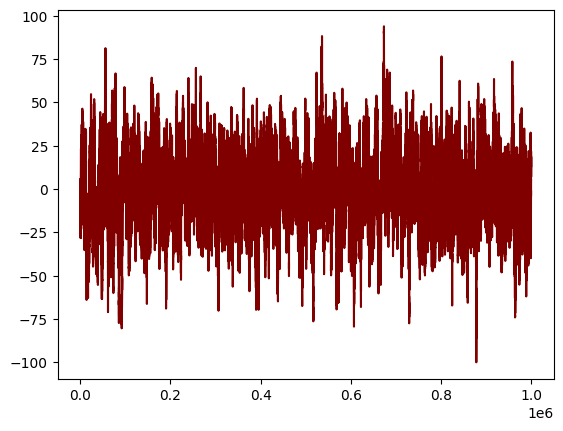

In [ ]:
a = 0.999                      
n3 = 1000000                         # number of times the x axis will spand

z = norm.rvs(size = n3+1    )            # normally distributed white noise
x = np.zeros(n3+1)                   # nupy array filled with 0s, +1 (why are we doing plus one?)
x[0] = 1

for i in range(1, n3+1):
    x[i] = a * x[i-1] + z[i]        # applying the formula x. A times the prevoius x value, plus current i white noise

plt.plot(x, color='maroon')
plt.show()


## Task 1.3
Now generate the first 10^6 of the time series Yn = Yn-1 + Wn, where {Wn} is another white
noise, Wn ~N (0,1), generated separately from {Zn}. Choose Y0 = 5. Store it in y and
make two graphs for Xn and Yn on the same plot (by typing two commands plt.plot with one plt. show() at the end). Make them in different colours: blue for x and red for y.

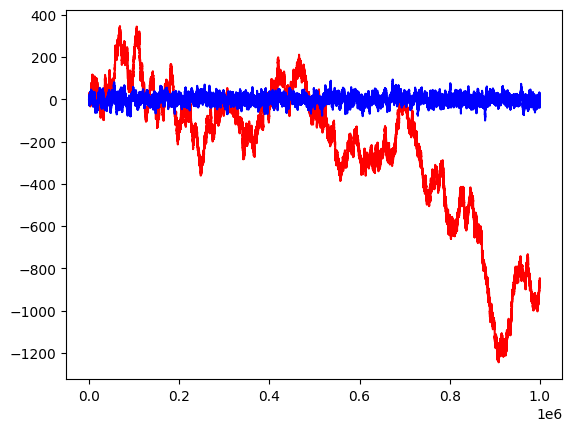

In [81]:
a = 1
n1 = 1000000
y = np.zeros(n1+1)
y[0] = 5

Wn = norm.rvs(size = n1+1)

for i in range(1, n1+1):
    y[i] = a * y[i-1] + Wn[i]

plt.plot(y, color= 'red')
plt.plot(x, color='blue')
plt.show()

# AR (2)-model

In **AR(2)**-model, we have
$$X_n = aX_{n-1} + bX_{n-2} + Z_n.$$

Then, we need to set values to $X_0$ and $X_1$, and then we can define iteratively
$$\begin{aligned} X_2 &= aX_1 + bX_0 + Z_2, \\ X_3 &= aX_2 + bX_1 + Z_3, \\ X_4 &= aX_3 + bX_2 + Z_4, \\ \vdots \end{aligned}$$

## Task 1.4
Consider the example from a lecture: $X_n = \frac{1}{12} X_{n-1} + \frac{1}{2} X_{n-2} + Z_n$. Set $X_0 = X_1 = 1$. Generate $10^4$ values (note that you should start from $n = 2$) and assign them to x. Plot the graph of x.

The time series demonstrates stationary behaviour.

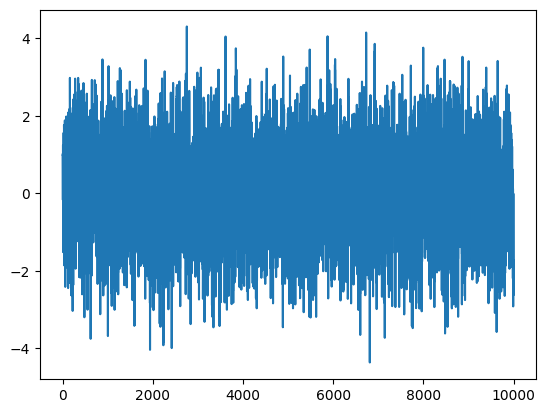

In [82]:
n2 = 10000
x = np.zeros(n2+1)

x[0], x[1] = 1, 1

a1 = 1/12
a2 = 1/2

Zn = norm.rvs(size = n2+1)

for i in range(5, n2+1):
    x[i] = a1*x[i-1] + a2*x[i-2] + Zn[i]

plt.plot(x)
plt.show()



## $\text{ARMA}(2, q)$-model

Recall that $\text{ARMA}(2, q)$ means that
$$X_n = aX_{n-1} + bX_{n-2} + Z_n + \beta_1 Z_{n-1} + \dots + \beta_q Z_{n-q}$$

We discussed on a lecture that $\text{MA}$-part with past white noises does not affect the stationarity (or non-stationarity) of $\text{AR}$-part.

To model e.g. $\text{ARMA}(2, 3)$, i.e.
$$X_n = aX_{n-1} + bX_{n-2} + Z_n + \beta_1 Z_{n-1} + \beta_2 Z_{n-2} + \beta_3 Z_{n-3}.$$

we notice that
$$\begin{aligned} X_2 &= aX_1 + bX_0 + Z_2 + \beta_1 Z_1 + \beta_2 Z_0 + \beta_3 Z_{-1}, \\ X_3 &= aX_2 + bX_1 + Z_3 + \beta_1 Z_2 + \beta_2 Z_1 + \beta_3 Z_0, \\ X_4 &= aX_3 + bX_2 + Z_4 + \beta_1 Z_3 + \beta_2 Z_2 + \beta_3 Z_1, \\ \vdots \end{aligned}$$

Hence, we need to set $X_0$ and $X_1$ and also $Z_{-1}$. Usually, $Z_{-1} = 0$.

Consider a modification of the previous time series $X_n$, keeping $\text{AR}$-part:
$$Y_n = \frac{1}{12} Y_{n-1} + \frac{1}{2} Y_{n-2} + Z_n + 2Z_{n-1} + 3Z_{n-2} + 4Z_{n-3}.$$
Choose $Z_{-1} = 0$ (note that in Python, if **a** is an array or list, then $\text{a}[-1]$ means the last element of this array), and $Y_0 = Y_1 = 1$. Generate $10^4$ values and assign them to **y**.

Let's plot both $\{X_n\}$ and $\{Y_n\}$ on the same diagram:

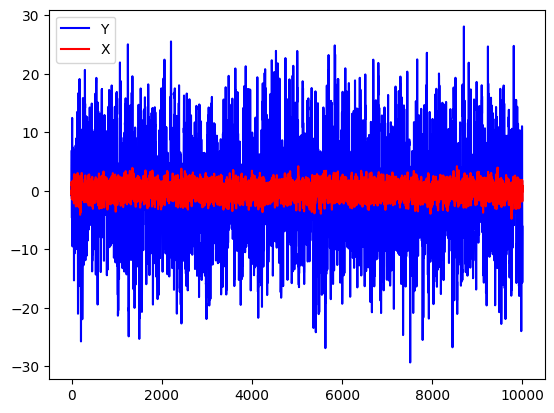

In [96]:
n2 = 10000
y = np.zeros(n2+1)

y[0], y[1] = 1, 1

a1 = 1/12
a2 = 1/2

Zn = norm.rvs(size = n2+1)
Zn[0] = 0

for i in range(1, n2+1):
    y[i] = a1*y[i-1] + a2*y[i-2] + Zn[i] + 2*Zn[i-1] + 3*Zn[i-2] + 4*Zn[i-3]

# ---

x = np.zeros(n2+1)

x[0], x[1] = 1, 1

a1 = 1/12
a2 = 1/2

Zn = norm.rvs(size = n2+1)

for i in range(1, n2+1):
    x[i] = a1*x[i-1] + a2*x[i-2] + Zn[i]

# ---



plt.plot(y, color = 'blue', label = 'Y')
plt.plot(x, color = 'red', label = 'X')

plt.legend()
plt.show()

## $\text{ARMA}(3, 3)$-model

Recall that, for $\text{ARMA}(3, 3)$-model:
$$X_n = aX_{n-1} + bX_{n-2} + cX_{n-3} + Z_n + \beta_1 Z_{n-1} + \beta_2 Z_{n-2} + \beta_3 Z_{n-3}.$$

we would need to consider the **characteristic equation**
$$1 - a\lambda - b\lambda^2 - c\lambda^3 = 0$$

We know from algebra, that
$$1 - a\lambda - b\lambda^2 - c\lambda^3 = -c(\lambda - \lambda_1)(\lambda - \lambda_2)(\lambda - \lambda_3),$$

where $\lambda_1, \lambda_2, \lambda_3$ are the **roots** of the characteristic equation. We know also that if $|\lambda_1| > 1$, $|\lambda_2| > 1$, $|\lambda_3| > 1$, then the $\text{ARMA}(3, q)$ time series is **stationary** (for any $q$, actually).

## 2. If you have more time

Choose any $\lambda_1, \lambda_2, \lambda_3$ such that $|\lambda_1| > 1$, $|\lambda_2| > 1$, $|\lambda_3| > 1$. Calculate $a, b, c$ such that $1 - a\lambda - b\lambda^2 - c\lambda^3 = -c(\lambda - \lambda_1)(\lambda - \lambda_2)(\lambda - \lambda_3)$ would be true (to get that $1$ you will need $c$ such that $c\lambda_1\lambda_2\lambda_3 = 1$). Model the corresponding $\text{ARMA}(3, 3)$ model (with e.g. $\beta_1 = \beta_2 = \beta_3 = 1$) and ensure that the behaviour is stationary.

In [ ]:
l1 = 5

x3 = np.zeros(n)